# Regresión lineal y polinómica


### Analytics Product Management

**Yudy Castaño Aristizábal**

Maestria en Business Analytics

**Universidad Carlos III de Madrid**

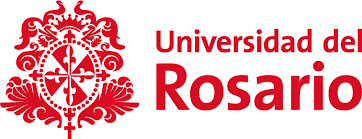


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ssl
import certifi
import urllib.request

%matplotlib inline

# Base de datos: California Housing

Para esta sesión vamos a trabajar con la base de datos de **California Housing** donde a partir de un conjunto de 8 descriptores de bloques de viviendas:

* MedInc: Mediana de los Ingresos por bloque

* HouseAge: Mediana de la edad de la casa por bloque

* AveRooms: Número medio de habitaciones

* AveBedrms: Número medio de dormitorios

* Population: Población en el bloque

* AveOccup: Ocupación media por vivienda

* Latitude: latitud del bloque de viviendas

* Longitude: longitud del bloque de viviendas

El objetivo del problema es estimar el valor medio de una casa dentro del bloque de viviendas (las etiquetas se corresponden con el valor medio de la casa en unidades de 100K€).
Esta base de datos cuenta con más de 20K muestras, para trabajar en este notebook nos quedaremos con un subconjunto de unas 2K.


### Carga y preprocesado de datos



Number of data: 2064


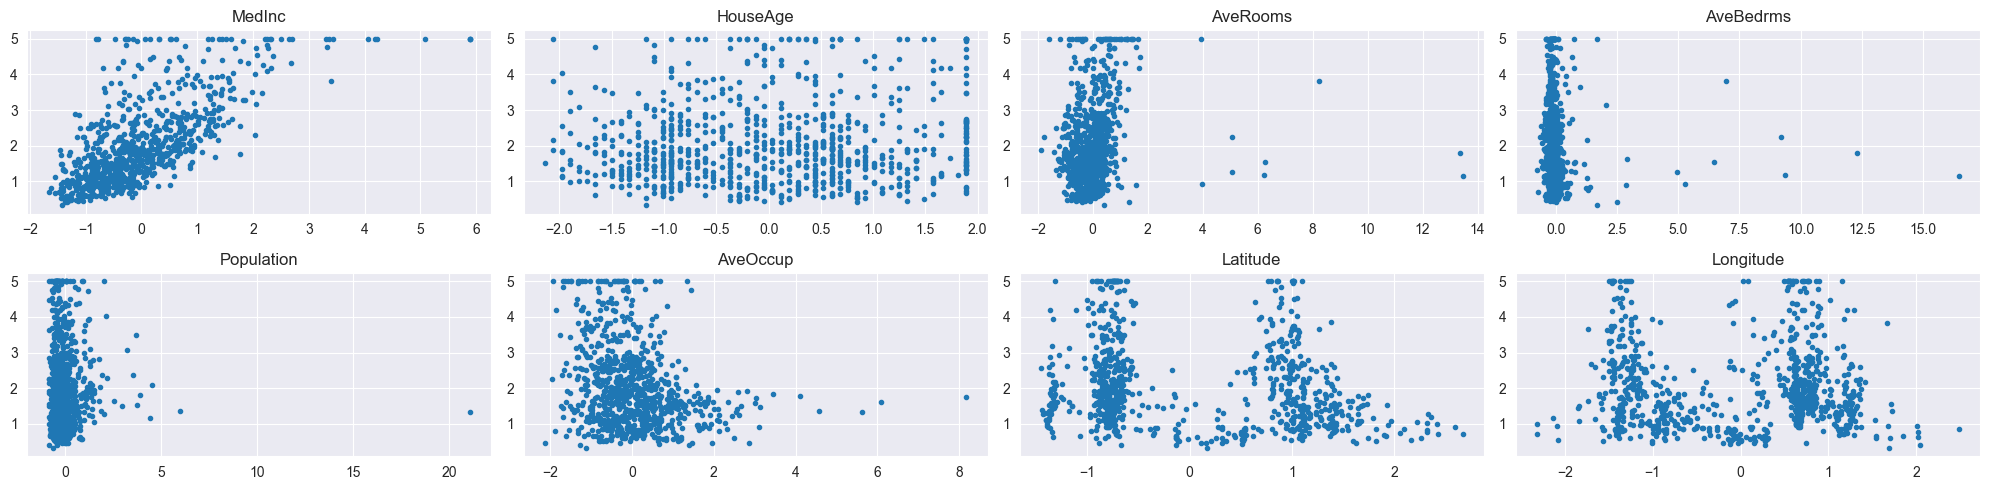

In [2]:
# Load data and analize the data

housing = fetch_california_housing()
X = housing.data
Y = housing.target
feature_names = housing.feature_names

# ~2k samples is enough for the purpose of this notebook.
# Remove the following two lines for a slower run with the complete dataset.
X = X[::10]
Y = Y[::10]

print('Number of data: %s' %X.shape[0])
D = X.shape[1]

# Generate train and test partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=0)

# Data normalization
transformer = StandardScaler().fit(X_train)  # fit() learns mean and std parameters
X_train_norm = transformer.transform(X_train) # transform() normalizes
X_test_norm =  transformer.transform(X_test)

plt.figure( figsize=(20,5))
for d in range (D):
  plt.subplot(2,4,d+1)
  plt.plot(X_train_norm[:,d],Y_train,'.',)
  plt.title(feature_names[d])

plt.tight_layout()

#Viendo las relaciones entre las variables de entrada y la de salida, si buscamos un modelo lineal, ¿qué variable o variables piensas que pueden ser más adecuadas?
# ¿Podemos hacer este análisis con algún estadístico o medida de relación lineal entre la variable de entrada y la de salida?

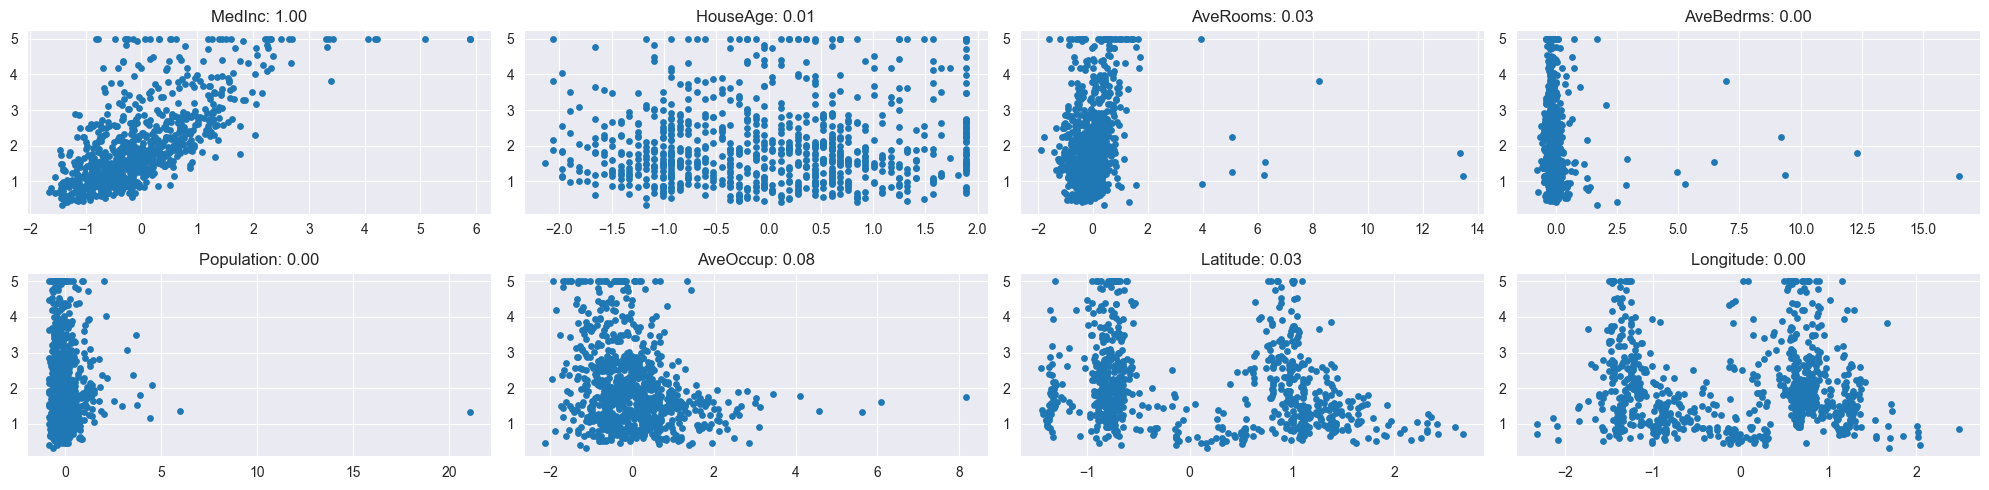

In [3]:
from sklearn.feature_selection import f_regression

f_train, _ = f_regression(X_train_norm, Y_train)
f_train_n = f_train/np.max(f_train) # normalizamos porque nos importan valores relativos
ndim = X_train_norm.shape[1]
nrow=2
ncol=4
fx, ax = plt.subplots(nrow, ncol, figsize=(20,5))
jj=0
for rr in range(nrow):
  for cc in range(ncol):
    ax[rr][cc].scatter(X_train_norm[:,jj], Y_train, s=15)
    ax[rr][cc].set_title("{0}: {1:.2f}".format(feature_names[jj],f_train_n[jj]))
    jj += 1
    if jj == ndim:
      break
fx.tight_layout()

Para facilitar el análisis y visualización de los resultados, de ahora en adelante vamos a trabajar con una sola variable y para ello vamos a usar la variable *MedInc (MI)* (variable #1).

Nota: Recordemos que aunque nosotros contamos las variables desde $1$ a $D$ o los datos en el rango $1, \ldots, N$; sin embargo, Python empieza el indexado en $0$. Así que nuestra primera variable tiene la posición $0$ en Python.

In [4]:
# Feature selection 0 (Medinc)
id_feat = 0
X_train_MI = X_train_norm[:, id_feat][:,np.newaxis]
X_test_MI = X_test_norm[:, id_feat][:,np.newaxis]

# El modelo de regresión lineal

Consideremos que tenemos un conjunto de **datos de entrenamiento** con $N$ entradas de la forma $(\mathbf{x}^{(i)},y^{(i)})$, donde $\mathbf{x}^{(i)}\in\mathbb{R}^D$ son las observaciones e $y^{(i)}\in\mathbb{R}$ las etiquetas a estimar.  Cada dato, muestra u observación es un vector con $D$ elementos, $\mathbf{x}=[x_1, \ldots, x_D]$, y a cada uno de estos elementos vamos a llamarlo variable o **característica**.

Aquí, usaremos este conjunto de datos de entrenamiento para aprender un modelo  **lineal** dado por:

$$f(\mathbf{x}) =  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_D x_D, $$

donde $w_0$ es el término independiente (no multiplica a ninguna de las variables de entrada) y captura el **sesgo** de $y$. Para formular este problema, vamos a considerar una versión extendida de los datos de entrada donde añadimos una nueva variable con valor igual a 1, es decir, $\mathbf{x}_e=[1, x_1, \ldots, x_D]$. De modo que podemos escribir nuestro modelo de manera más compacta como:

$$f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}_e$$

Este modelo se llama **regresión lineal** ya que aproxima la variable objetivo $y$ por una combinación lineal de las variables de entrada.

Para aprender o ajustar los valores de $\mathbf{w}$, necesitamos definir una **función de coste o pérdidas** que penalice los errores que cometa nuestro modelo en la estimación de $y$. Para ello, el modelo de regresión lineal utiliza el **error cuadrático medio**:

$$J_{train}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^\top\mathbf{x}_e^{(i)})^2$$

Por lo tanto, nuestro objetivo es encontrar la solución del siguiente problema:

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^\top\mathbf{x}_e^{(i)})^2 $$

Por suerte, independientemente de la dimensión de $\mathbf{w}$, este problema puede resolverserse fácilmente ya que tiene una forma cerrada conocida como solución de **minimos cuadrados**:

$$\mathbf{w}^* = (\mathbf{X}_e^\top\mathbf{X}_e)^{-1}\mathbf{X}_e^\top\mathbf{y},$$
donde
- ${\mathbf{X}_e}_{N\times (D+1)}$ es la versión extendida de los datos de entrenamiento, donde la final $i$-iésima es $\mathbf{x}_e^{(i)}= [1, x^{(i)}_1, \ldots, x^{(i)}_D]$
- $\mathbf{y}_{(N\times 1)}$ es el vector con las etiquetas asociadas a los datos de entrenamiento.
- $ (\mathbf{X}_e^\top\mathbf{X}_e)^{-1}\mathbf{X}_e$ es la [pseudoinversa de  Moore–Penrose](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html) de $\mathbf{X}_e$.

---

### Analicemos la función de coste

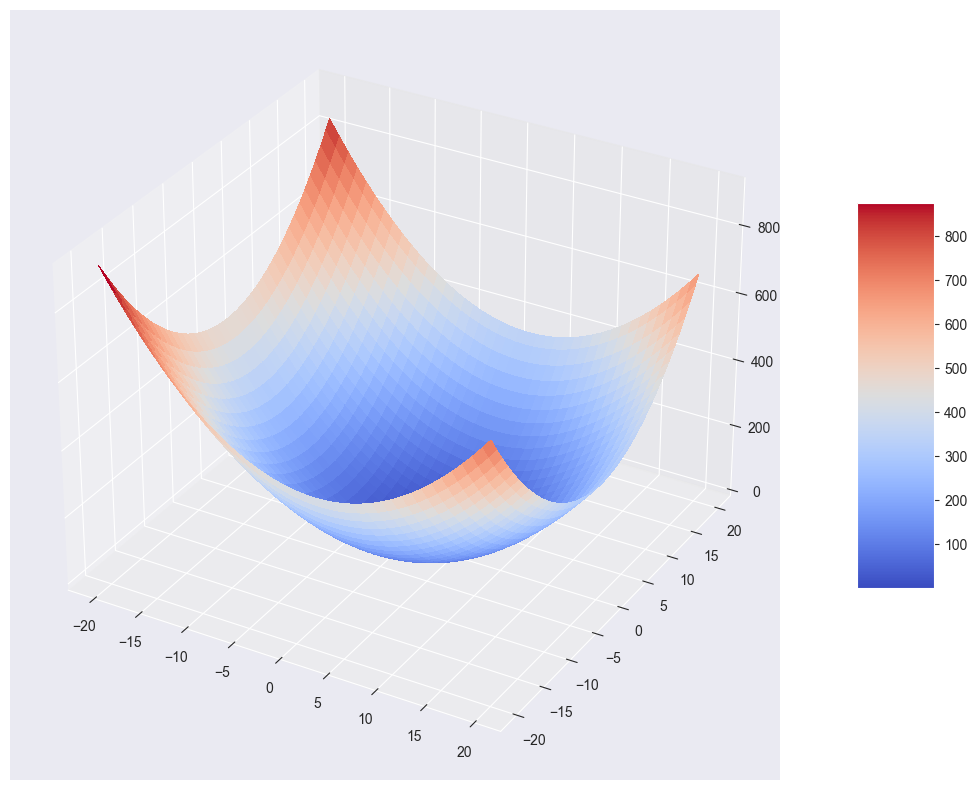

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def cost_function(w_0,w_1,y,x):
    J = np.mean((np.tile(y,(w_0.shape[0],1)).T-(x[:,0][:, np.newaxis]*w_0[:, np.newaxis].T+x[:,1][:, np.newaxis]*w_1[:, np.newaxis].T))**2,axis=0)
    return J


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection = '3d')

# Make data.
w_0 = np.arange(-20, 20, 0.25)
w_1 = np.arange(-20, 20, 0.25)
w_0, w_1 = np.meshgrid(w_0, w_1)
J = cost_function(w_0.ravel(),w_1.ravel(),Y_train, np.concatenate((np.ones((X_train_MI.shape[0],1)), X_train_MI) , axis=1))
# Plot the surface.
surf = ax.plot_surface(w_0, w_1, J.reshape(w_0.shape), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Como vemos  $J_{train}(\mathbf{w})$ es [**convexa**](http://mathworld.wolfram.com/ConvexFunction.html) respecto a $\mathbf{w}$, y por tanto tiene un **único mínimo**, lo que hace que la solución que estamos buscando sea única.


### Material adicional

Podemos demostrar que la solución de

$$\mathbf{w}^* = \arg \min_{\mathbf{w}} \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^\top\mathbf{x}_e^{(i)})^2 $$


está dada por  

$$\mathbf{w}^* = (\mathbf{X}_e^\top\mathbf{X}_e)^{-1}\mathbf{X}_e^\top\mathbf{y},$$

Para ello, calculemos el gradiente del error cuadrático medio sobre los datos de entrenamiento ($J_{train})$:

$$\nabla_{\mathbf{w}} J_{train}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)}-\mathbf{w}^\top\mathbf{x}_e^{(i)}) {\mathbf{x}_e^{(i)}}^\top $$

Igualando este gradiente a cero:
$$\sum_{i=1}^{N} y^{(i)} {\mathbf{x}_e^{(i)}}^\top - \mathbf{w}^\top \sum_{i=1}^{N} \mathbf{x}_e^{(i)} {\mathbf{x}_e^{(i)}}^\top  = 0$$

Y usando notación matricial y resolviendo la ecuación anterior respecto a  $\mathbf{w}$, tenemos:

$$\mathbf{w}^* = (\mathbf{X}_e^\top\mathbf{X}_e)^{-1}\mathbf{X}_e^\top\mathbf{y},$$


**Ayuda sobre operaciones con matrices en Python**

In [6]:
# Concatenación de matrices
my_array = np.array([[1, -1, 3, 3],[2, 2, 4, 6]])
print('Array 1:')
print(my_array)
print(my_array.shape)

my_array2 = np.ones((2,3))
print('Array 2:')
print(my_array2)
print(my_array2.shape)


# Vertically stack matrix my_array with itself
ex1_res = np.vstack((my_array,my_array))
print('Concatenación vertical:')
print(ex1_res)

ex1_res2 = np.concatenate((my_array,my_array) , axis=0)
print(ex1_res2)


# Horizontally stack matrix my_array and my_array2
ex2_res = np.hstack((my_array,my_array2))
print('Concatenación horizontal:')
print(ex2_res)

ex2_res2 = np.concatenate((my_array,my_array2) , axis=1)
print(ex2_res2)


Array 1:
[[ 1 -1  3  3]
 [ 2  2  4  6]]
(2, 4)
Array 2:
[[1. 1. 1.]
 [1. 1. 1.]]
(2, 3)
Concatenación vertical:
[[ 1 -1  3  3]
 [ 2  2  4  6]
 [ 1 -1  3  3]
 [ 2  2  4  6]]
[[ 1 -1  3  3]
 [ 2  2  4  6]
 [ 1 -1  3  3]
 [ 2  2  4  6]]
Concatenación horizontal:
[[ 1. -1.  3.  3.  1.  1.  1.]
 [ 2.  2.  4.  6.  1.  1.  1.]]
[[ 1. -1.  3.  3.  1.  1.  1.]
 [ 2.  2.  4.  6.  1.  1.  1.]]


In [7]:
# Transponer matrices
x1 = np.arange(9).reshape((3, 3))
print('x1:\n', x1)
print('\nTranspuesta de x1 usando la función de numpy:\n', np.transpose(x1))
print('\nTranspuesta de x1 usando el método de ndarray:\n', x1.transpose())
print('\nTranspuesta de x1 usando la forma abreviada:\n', x1.T)

x1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

Transpuesta de x1 usando la función de numpy:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

Transpuesta de x1 usando el método de ndarray:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]

Transpuesta de x1 usando la forma abreviada:
 [[0 3 6]
 [1 4 7]
 [2 5 8]]


In [8]:
# Multiplicación de matrices
x1 = np.arange(9).reshape((3, 3))
x2 = np.ones((3, 3)) * 2 # a 3x3 array with 2s in every cell

result = np.dot(x1, x2)
print('\nProducto matricial entre x1 y x2 usando np.dot():\n', result, '\n')

result = x1@ x2
print('\nProducto matricial entre x1 y x2 usando @:\n', result, '\n')


Producto matricial entre x1 y x2 usando np.dot():
 [[ 6.  6.  6.]
 [24. 24. 24.]
 [42. 42. 42.]] 


Producto matricial entre x1 y x2 usando @:
 [[ 6.  6.  6.]
 [24. 24. 24.]
 [42. 42. 42.]] 



In [9]:
# Inversión de matrices
x1 = np.array([[1, -1, 3],[0, -2, 3],[2, 4, 6]])
x1I = np.linalg.inv(x1)
print(x1@x1I)

[[ 1.00000000e+00 -5.55111512e-17  5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11022302e-16  1.00000000e+00]]


### Ejercicio 1

Diseñemos el regresor lineal de mínimo error cuadrático medio para nuestro problema (usando una sola variable de entrada) y evaluemos sus prestaciones. Para ello sigamos los siguientes pasos:

### Ejercicio 1.1: Prepara los datos

Primero de todo construyamos la matriz de datos extendida ${\mathbf{X}_e}$ para los conjuntos de entrenamiento y test añadiendo una primera columna de unos a las matrices `X_train_MI` y `X_test_MI`. Llama a estas nuevas matrices de datos `X_train_e` y `X_test_e`. Puedes usar las funciones [`np.concatenate()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) y [`np.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) de numpy.


### SOLUTION

In [10]:
train_ones = np.ones((X_train_MI.shape[0], 1))
test_ones = np.ones((X_test_MI.shape[0], 1))
X_train_e = np.concatenate((train_ones, X_train_MI), axis=1)
X_test_e = np.concatenate((test_ones, X_test_MI), axis=1)



### Ejercicio 1.2: Calcula la solución de mínimos cuadrados de $\mathbf{w}$

Como hemos visto la solución de $\mathbf{w}$ viene dada por:

$$\mathbf{w}^* = (\mathbf{X}_e^\top\mathbf{X}_e)^{-1}\mathbf{X}_e^\top\mathbf{y},$$

Calcula el valor de $\mathbf{w}^*$ (usando los datos de entrenamiento) y almacena el resultado en la variable `w_start`.

### SOLUTION

# <SOL>
# </SOL>

MSE en el conjunto de prueba: 0.7070010421171564


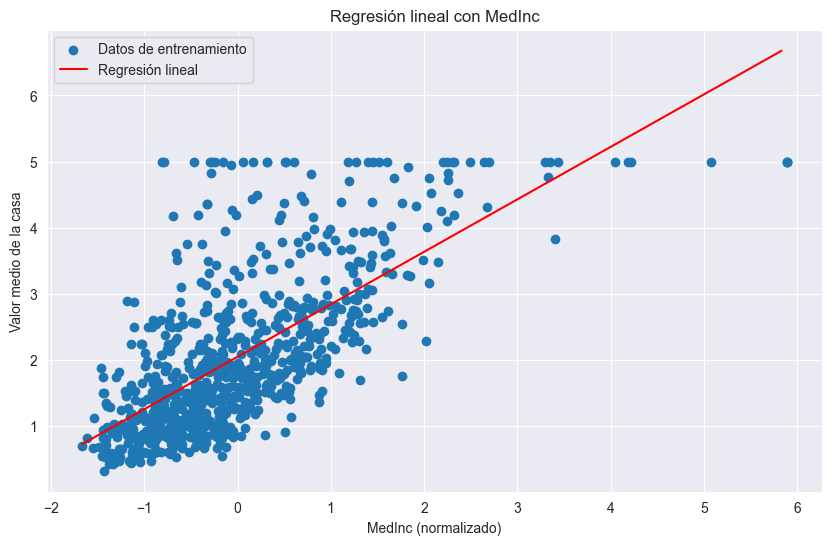

In [11]:
from sklearn.metrics import mean_squared_error

# Ejercicio 1.2: Calcula la solución de mínimos cuadrados
w_start = np.linalg.inv(X_train_e.T @ X_train_e) @ X_train_e.T @ Y_train

# Ejercicio 1.3: Evalúa prestaciones
Y_pred = X_test_e @ w_start
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE en el conjunto de prueba: {mse}')

# Ejercicio 1.4: Representa la curva de regresión
x_range = np.arange(X_train_MI.min(), X_train_MI.max(), 0.1)
x_range_e = np.concatenate((np.ones((len(x_range), 1)), x_range[:, np.newaxis]), axis=1)
y_range_pred = x_range_e @ w_start

plt.figure(figsize=(10, 6))
plt.scatter(X_train_MI, Y_train, label='Datos de entrenamiento')
plt.plot(x_range, y_range_pred, color='red', label='Regresión lineal')
plt.xlabel('MedInc (normalizado)')
plt.ylabel('Valor medio de la casa')
plt.title('Regresión lineal con MedInc')
plt.legend()
plt.show()

In [12]:
# Cálculo del vector w (beta)
w_start = np.linalg.inv(X_train_e.T @ X_train_e) @ X_train_e.T @ Y_train

# Imprimir el vector w
print("Vector w (beta):", w_start)

Vector w (beta): [2.05121136 0.79264135]


**Puesta en produccion**

In [13]:
import pickle
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Carga y preprocesamiento de datos
housing = fetch_california_housing()
X = housing.data
Y = housing.target
X = X[::10]
Y = Y[::10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

# Selección de la característica 'MedInc'
id_feat = 0
X_train_MI = X_train_norm[:, id_feat][:, np.newaxis]

# Construcción de la matriz extendida X_train_e
train_ones = np.ones((X_train_MI.shape[0], 1))
X_train_e = np.concatenate((train_ones, X_train_MI), axis=1)

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train_e, Y_train)

#Asumiendo que tienes un modelo entrenado llamado "modelo"
beta_0 = modelo.intercept_
beta_1 = modelo.coef_

print(f"Beta 0 (intercepto): {beta_0}")
print(f"Beta 1 (pendiente): {beta_1}")

# Guardar el modelo entrenado
with open('modelo_regresion_lineal.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)

Beta 0 (intercepto): 2.0512113575757587
Beta 1 (pendiente): [0.         0.79264135]



Para simular la puesta en producción, crearemos un script simple que carga el modelo y realiza una predicción con nuevos datos.





In [14]:
import pickle
import numpy as np

# Cargar el modelo
with open('modelo_regresion_lineal.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

# Datos de ejemplo para realizar una estimación
nuevo_ingreso = np.array([[1, 3]])  # [1, ingreso]. El 1 es para el término independiente.

# Realizar la estimación
prediccion = modelo_cargado.predict(nuevo_ingreso)

print(f'La predicción es: {prediccion}')

La predicción es: [4.42913542]


# La solución de los mínimos cuadrados con características polinómicas

**Las características pueden ser una transformación no lineal de una entrada dada!**

Es decir, podemos construir el modelo:
$$ f(\mathbf{x}) = w_0 + w_1 MI + w_2 MI^2 + w_3 MI^3,\ldots, w_D MI^D,$$

y tendríamos un modelo lineal (las componentes de $\mathbf{w}$ son lineales en el modelo) que nos permite interpolar una función no lineal respecto a la entrada $MI$. En este caso concreto estamos aproximando la función $f(MI)$ con un polinomio de orden $D$.

De hecho, si definimos el siguiente conjunto de **características**:

$$\mathbf{x} = [1, MI, MI^2, MI^3,\ldots, MI^D],$$

nuestro objetivo es encontrar $\mathbf{w}\in\mathbb{R}^{D+1}$ de tal manera que
$$ f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x},$$
y esto sigue siendo un **modelo de regresión lineal**.


____

### Ejercicio 2

Con esta idea, volvamos a nuestro ejemplo y estimemos el precio de las viviendas a partir de la variable $MI$ pero usando un modelo polinómico, de modo que nuestras caracteristicas van a ser:

$$\mathbf{x} = [MI,MI^2, \ldots, MI^D]$$

Nótese que aunque los valores de $MI$ ya estén  normalizados, después de calcular los términos polinómicos ($MI^2$, $MI^3$ ...), ¡debemos normalizar todas las nuevas características de nuevo! *¿por qué crees que es esto?*


Para ayudarte a diseñar este modelo, la siguiente celda implementa la función `learnPolyLR()`, que entrena un modelo de regresión polinómica, y devuelve los pesos del modelo junto con el MSE del conjunto de entrenamiento y el MSE del conjunto de test.

Compruebe cómo esta función le permite incluir el grado del polinomio y, mediante la función sklearn [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), obtiene la extensión polinómica de una matriz de datos. Entonces, normaliza los datos y entrena el modelo. Además, le permite dibujar la función de regresión (si los datos de entrada son unidimensionales).



### Ejercicio 2.1
Utilizando la función anterior entrene un modelo polinómico de grado 2, 5, 10, 15 y 20 utilizando como entrada la variable $MI$.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
def learnPolyLR(X_train, Y_train, X_test, Y_test, n_degree, addPlot=True):

  # Create polynomial version of training and test data (you don't need to include the bias here)
  polynomial_features = PolynomialFeatures(degree=n_degree,include_bias=False)

  X_train_pol = polynomial_features.fit_transform(X_train)
  X_test_pol = polynomial_features.transform(X_test)


  # Data normalization
  transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std

  X_train_pol = transformer.transform(X_train_pol)
  X_test_pol =  transformer.transform(X_test_pol)

  # Define Linear regression model and include the bias term
  myLR = LinearRegression(fit_intercept=True)
  # Train the model
  myLR.fit(X_train_pol, Y_train)

  # Compute the predictions
  f_tr = myLR.predict(X_train_pol)
  f_test = myLR.predict(X_test_pol)

  # Evaluate MSE
  MSE_train = np.mean((Y_train-f_tr)**2)
  MSE_test = np.mean((Y_test-f_test)**2)

  # Get regressor weights (without bias)
  w_star = myLR.coef_

  if addPlot and (X_train.shape[1]==1):
    X_min = np.min(X_train)
    X_max = np.max(X_train)
    X_plot = np.arange (X_min,X_max,0.001)[:,np.newaxis] # This is not data! Just to visualize the polynomial curve

    X_plot_pol = polynomial_features.transform(X_plot)

    # Data normalization
    X_plot_pol=  transformer.transform(X_plot_pol)

    # Compute the regression curve output
    f_plot = myLR.predict(X_plot_pol )

    # Plot the regression polynomial over train data
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(X_plot,f_plot)
    plt.plot(X_train, Y_train, '.r')
    plt.ylim(0,8)
    # Plot the regression polynomial over test data
    plt.subplot(1,2,2)
    plt.plot(X_plot,f_plot)
    plt.plot(X_test, Y_test, '.g')
    plt.ylim(0,8)

  return w_star, MSE_train, MSE_test

### SOLUTION


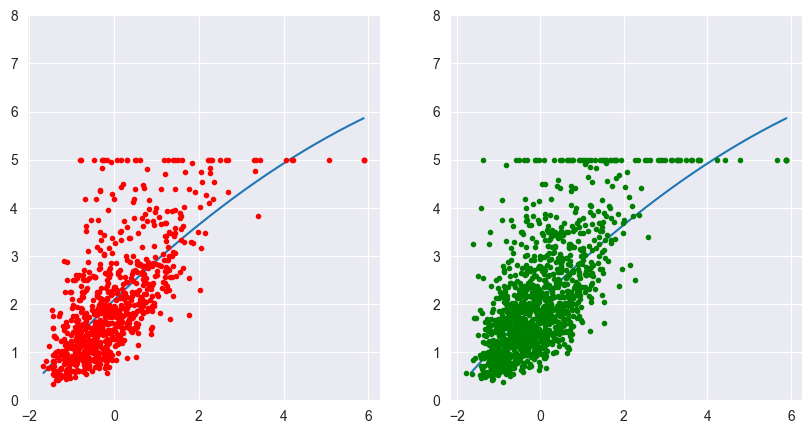

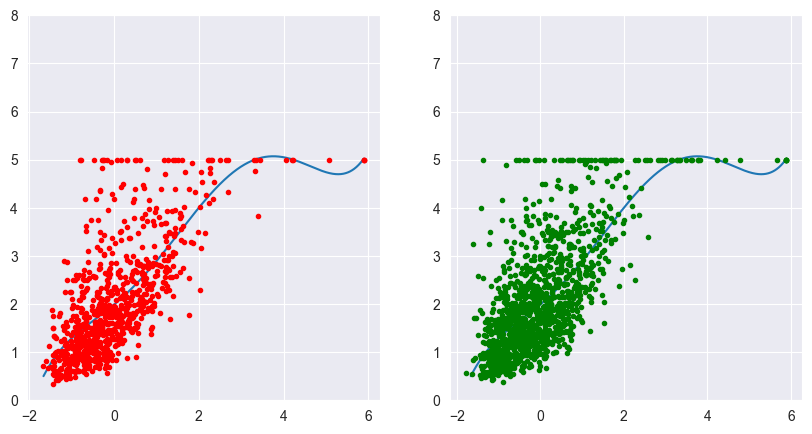

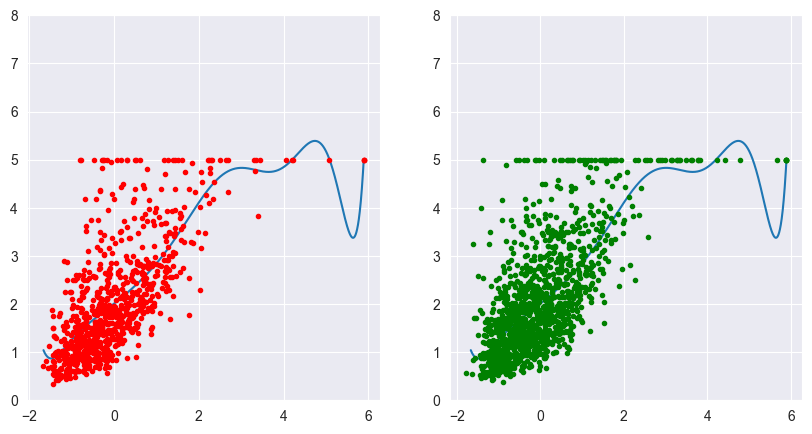

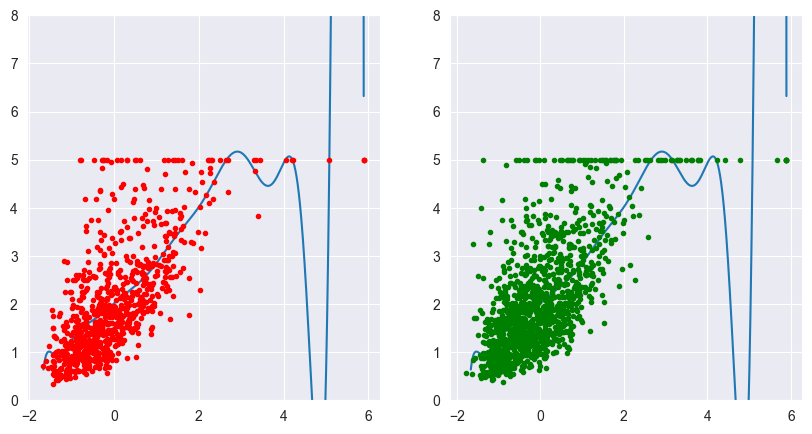

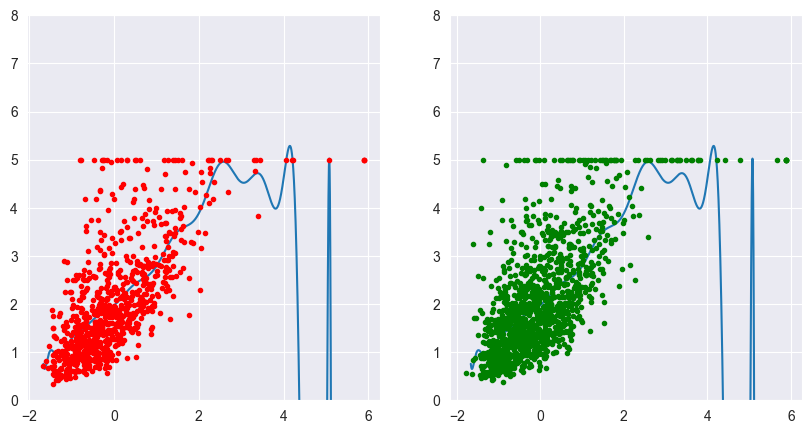

In [16]:
from sklearn.linear_model import LinearRegression
# Modelo sobreajustado
n_degree = 2, 5, 10, 15, 20
# <SOL>
grados = [2,5,10,15,20]
for grado in grados:
  polinomico = learnPolyLR(X_train_MI, Y_train, X_test_MI, Y_test, grado, addPlot=True)
# </SOL>

**Conclusión:** La selección del grado del polinómio es crítica para obtener buenas prestaciones -> Necesitamos aplicar **validación cruzada**


# Validación del modelo

Para validar el grado del polinomio adecuadamente, necesitamos aplicar un procedimiento de CV que nos mida las prestaciones del regresor para diferentes grados del polinonio.

Para poder hacer esto con el GridSearch de sklearn, necesitamos un objeto (tipo clasificador/regresor) que incluya todos los pasos de nuestro regresor polinómico:
1. Calcule características polinómicas (para un grado de polinomio dado)
2. Normalice estas características
3. Entrene el regresor y evalue sus prestaciones

Para hacer esto podemos usar los [pipeline](https://) de sklearn. Veamos cómo funcionan paso a paso con el siguiente ejemplo:


Vamos a empezar definiendo nuestro modelo de regresión polinómica con un *pipeline* para un grado de polinomio dado.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # This line should fix it
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# definamos el grado del polinomio (de momento fijamos este valor)
degree = 10

# Definimos el pipeline con sus pasos
PolyReg_pipeline = Pipeline(steps=[('Poly', PolynomialFeatures(degree)), ('Norm', StandardScaler()), ('LR', LinearRegression(fit_intercept=True))])

# Se entrena con .fit()
PolyReg_pipeline.fit(X_train_MI, Y_train)

# Podemos predecir la salida con .predict()
f_test = PolyReg_pipeline.predict(X_test_MI)

# Por último medimos prestaciones
MSE_test = np.mean((Y_test-f_test)**2)

print("The test MSE is:", MSE_test)

The test MSE is: 0.684422829491532


Y ahora, sobre el pipeline podemos aplicar un procedimiento de CV

In [18]:
from sklearn.model_selection import GridSearchCV

# Definimos los parametros a CV (cada parametro de asocia con su paso: Poly __ degree)
param_grid = {'Poly__degree': np.arange(1,20)}

# Creamos el grid search y validamos el grado del polinonio con fit
PolyReg_pipeline_grid = GridSearchCV(PolyReg_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
PolyReg_pipeline_grid.fit(X_train_MI, Y_train)

# Vemos el parametro seleccionado por CV
print('The CV result is:')
print(PolyReg_pipeline_grid.best_params_)

# Si queremos evaluamos el modelo aprendido
f_test = PolyReg_pipeline_grid.predict(X_test_MI)
MSE_test = np.mean((Y_test-f_test)**2)
print("The test MSE is:", MSE_test)

The CV result is:
{'Poly__degree': np.int64(5)}
The test MSE is: 0.6841195797704104


# ¿Regresión lineal para clasificar?
-------

En regresión lineal, en la que el target $y$ es un valor real ($y\in\mathbb{R}$), utilizamos un modelo del tipo

$$y \approx \mathbf{w}^T \mathbf{x}$$

- Sin embargo, en **clasificación binaria**, el target solo tiene dos posibles valores (que típicamente codificamos como $y\in\{0,1\}$).
- En este sentido el modelo de regresión lineal **no puede usarse como tal**. No se adapta de forma sencilla a estos dos únicos valores del target $y$.

In [19]:
from IPython.core.display import Image, display

/var/folders/jm/_5bk70k14871k1yd6dmg0kt40000gn/T/ipykernel_88971/229108241.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
from matplotlib import cm

# Configuración de las figuras matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 12})

In [22]:
from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

from warnings import filterwarnings
filterwarnings('ignore')


<a id='reg_logistica'></a>
# Regresión Logística
---
Video: https://www.youtube.com/watch?v=mjbWGx6Xgvg

En regresión logística (en adelante RL) aproximamos la probabilidad de la etiqueta $y$ usando una **combinación lineal** de las entradas $\bf x$:

$$P(y=1| {\bf x}) =  \frac{1}{1+\exp(-({\bf w}^T {\bf x}+w_0))}=\sigma({\bf w}^T {\bf x}+w_0)$$
$$$$
$$ P(y=0| {\bf x}) = 1- P(Y=y| {\bf x}) = 1 - \sigma({\bf w}^T {\bf x}+w_0)$$

donde

- $w_0$ y ${\bf w} = [w_1, \ldots, w_D]$ son parámetros que aprenderemos usando el conjunto de datos de entrenamiento $(\mathbf{x}^{(i)},y^{(i)})_{i=1,\ldots,N}$.
$$$$
- $\sigma(a) = \frac{1}{1+\exp(-a)}$ es la función sigmoide.
$$$$
- Fijaos que la probabilidad $P(y=1| {\bf x})$ es la misma todos los puntos $\mathbf{x}$ tales que ${\bf w}^T {\bf x}$ es constante.
$$$$
- Además, para todo $a\in\mathbb{R}$, ${\bf w}^T {\bf x} + w_0= a$ es la ecuación de un **plano** en un espacio de dimensión D (el número de componentes de $\mathbf{x}$). Por ejemplo, una recta en el caso $D=2$.

Representemos primero $\sigma(x)$.

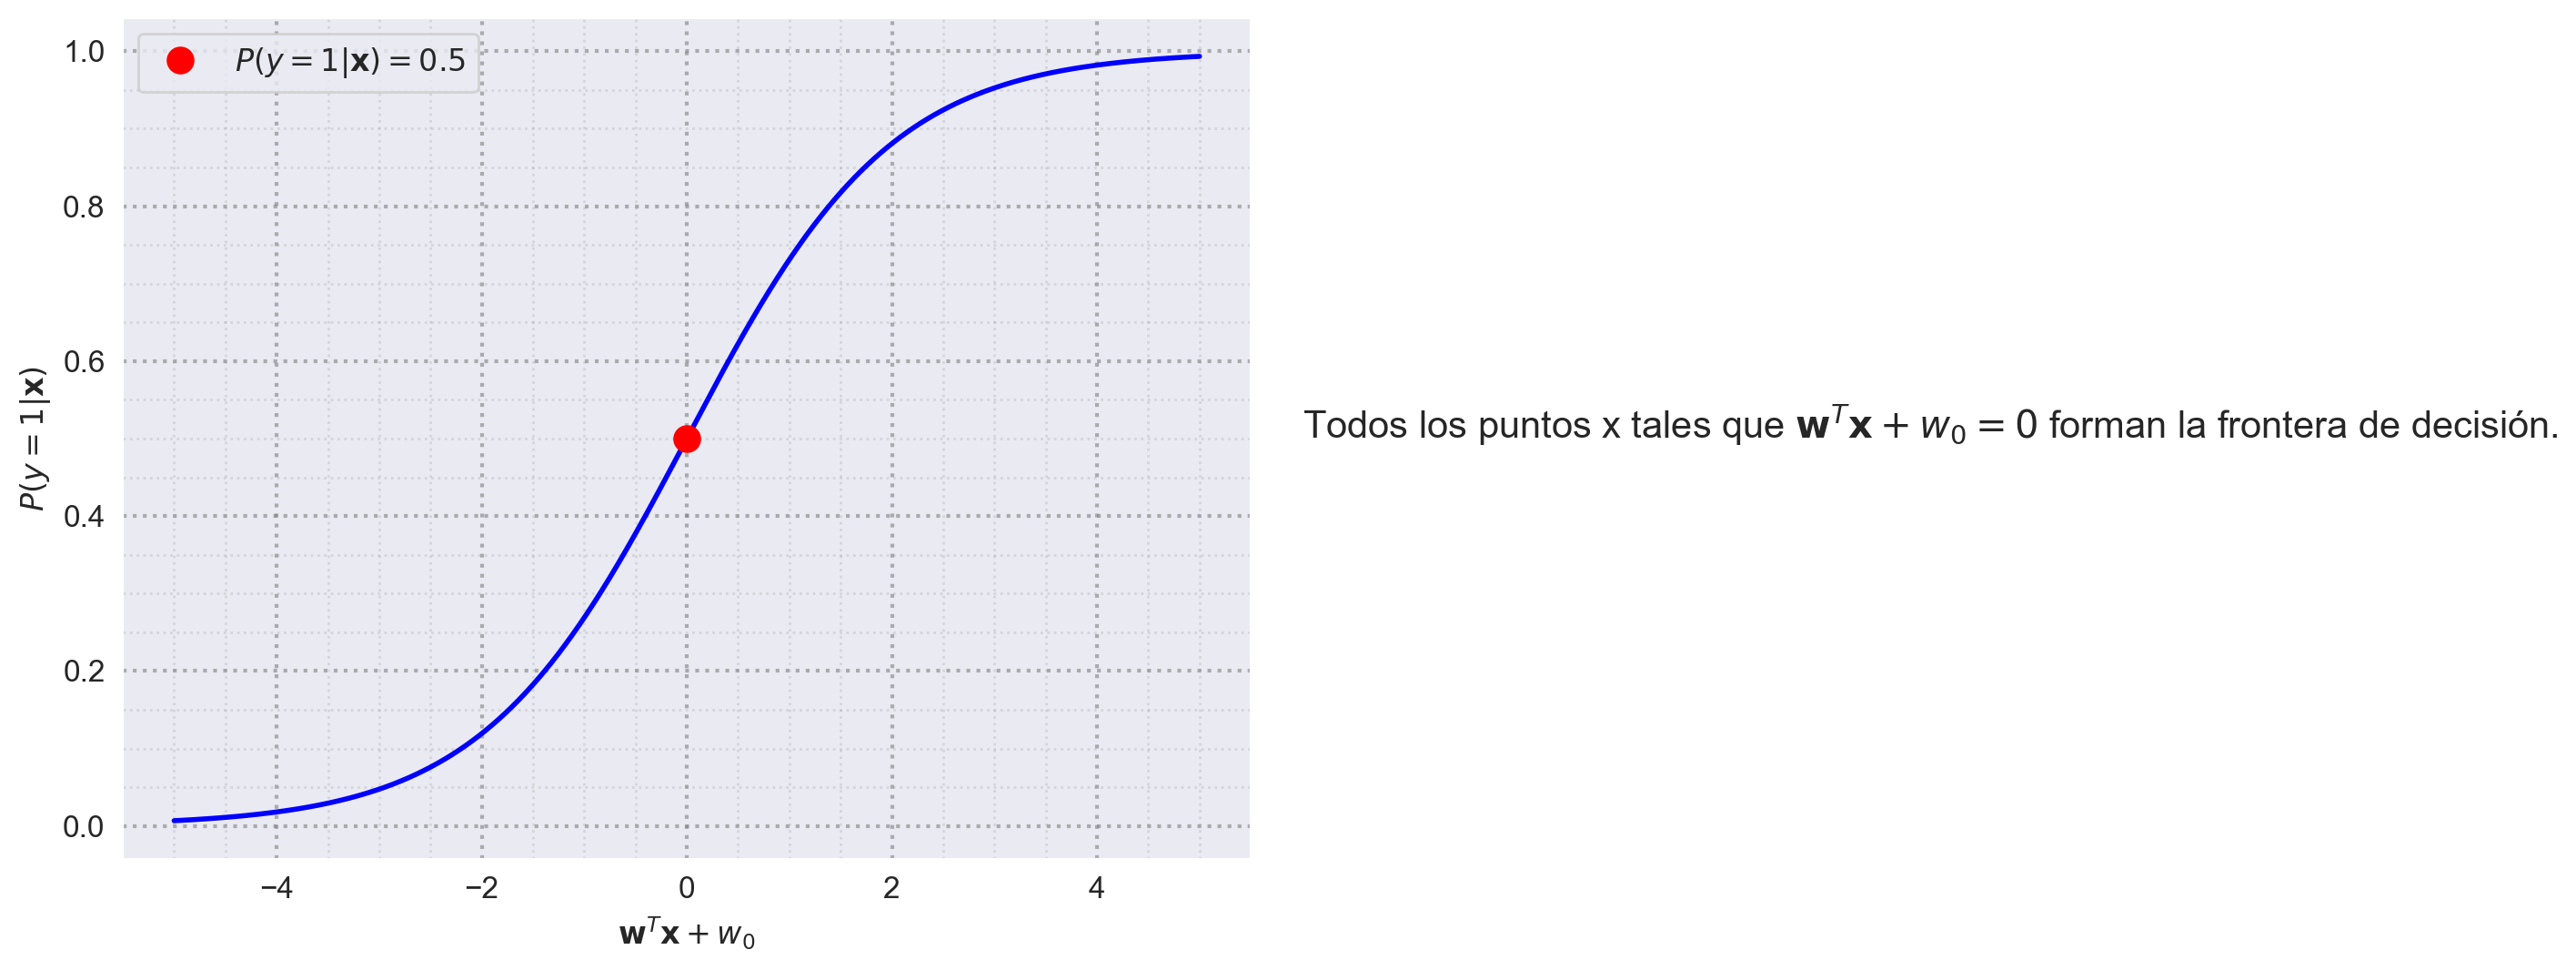

In [23]:
x = np.arange(-5,5,1e-3)

y = 1./(1+np.exp(-x))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y,'-b',lw=2)
ax.plot(0,0.5,'or',ms=10,label=r'$P(y=1|\mathbf{x})=0.5$')
plt.xlabel('$\mathbf{w}^T\mathbf{x}+w_0$')
plt.ylabel('$P(y=1|\mathbf{x})$')
plt.legend()
#major grid lines
plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
#minor grid lines
plt.minorticks_on()
plt.grid(which='minor', color='gray', alpha=0.2, ls='dotted', lw=1)

ax.text(6, 0.5, r'Todos los puntos x tales que $\mathbf{w}^T\mathbf{x}+w_0=0$ forman la frontera de decisión.', fontsize=15)

plt.show()

En un dataset de dos dimensiones, vamos a ver ahora qué ocurre a medida que variamos $\mathbf{w}$ y $w_0$.


In [24]:
data_ejemplo1 = pd.read_csv('ejemplo1.txt',header=None)

data_ejemplo1.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'ejemplo1.txt'

In [56]:
data = np.array(data_ejemplo1)

## Dimensiones
dims=np.shape(data)
N=dims[0]

## Separamos X e Y
X01=data[:,0:2]
Y1=data[:,2]

# Separamos train de test
X01_train, X01_test, Y1_train, Y1_test = train_test_split(X01, Y1, test_size=0.2, random_state=0)

print("El conjunto de datos de entrenamiento consta {0:d} observaciones de {1:d} dimensiones\n".format(X01_train.shape[0], X01_train.shape[1]))

# Variables para la representación de la frontera de decisión (antes de normalizar!)
min1=np.min(X01_train[:,0])-1
max1=np.max(X01_train[:,0])+1
min2=np.min(X01_train[:,1])-1
max2=np.max(X01_train[:,1])+1

# Normalizamos los datos (media 0, varianza 1)

transformer1 = StandardScaler().fit(X01_train)   # X0 -->sin normalizar, X --> normalizadas

X1_train = transformer1.transform(X01_train)
X1_test = transformer1.transform(X01_test)

El conjunto de datos de entrenamiento consta 80 observaciones de 2 dimensiones



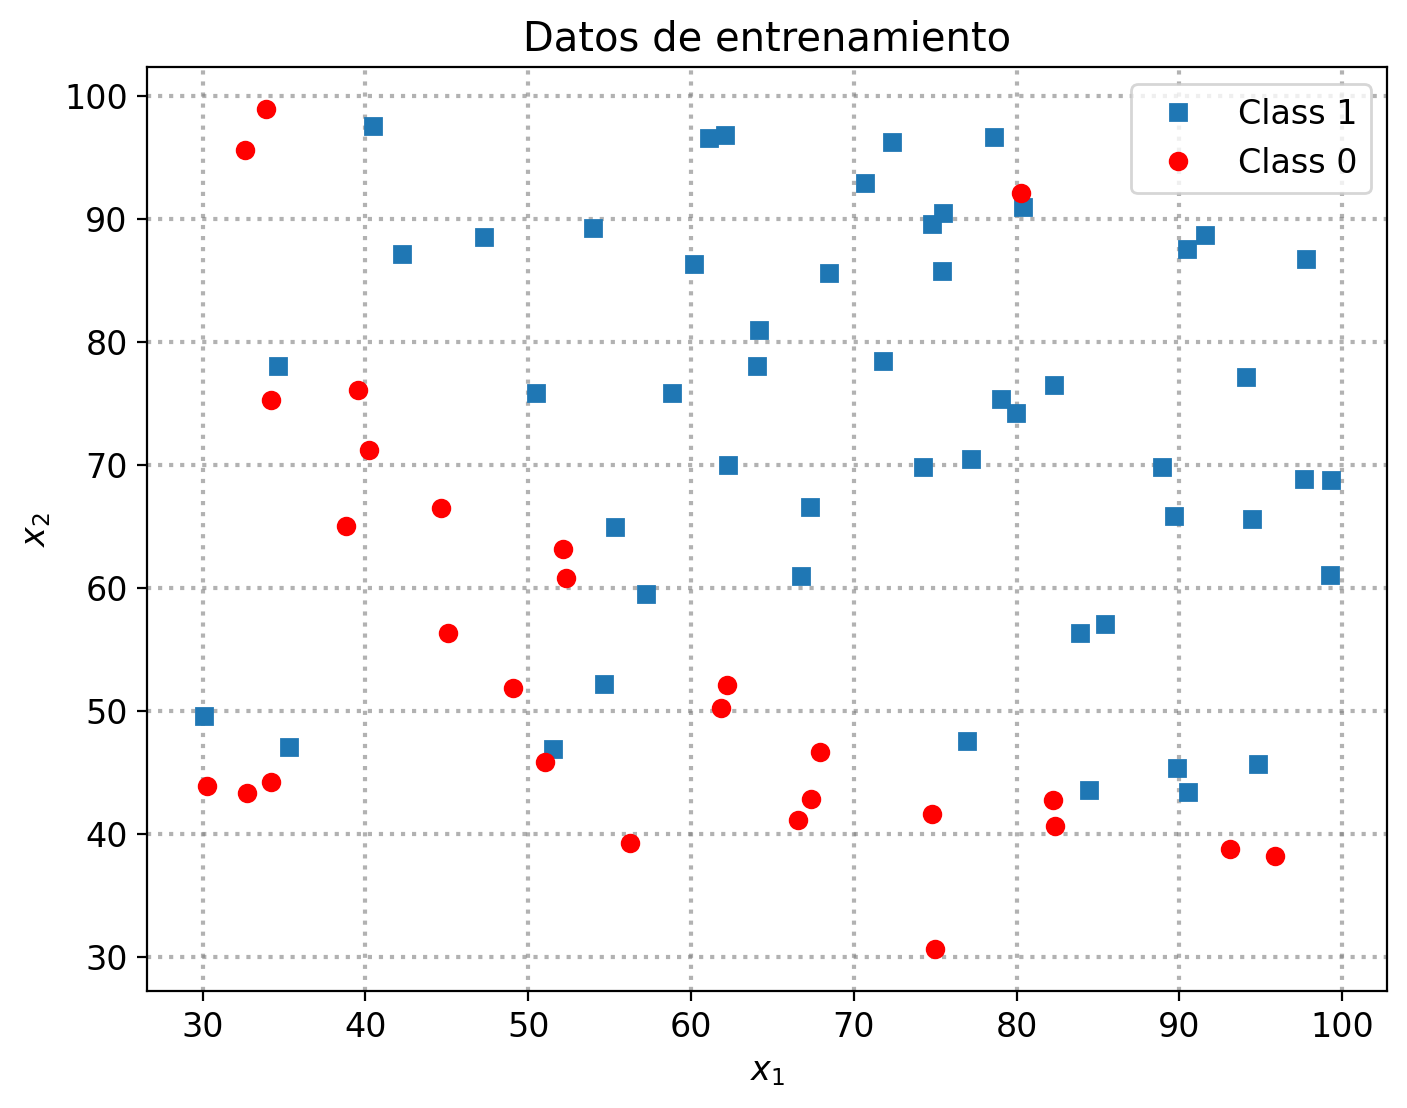

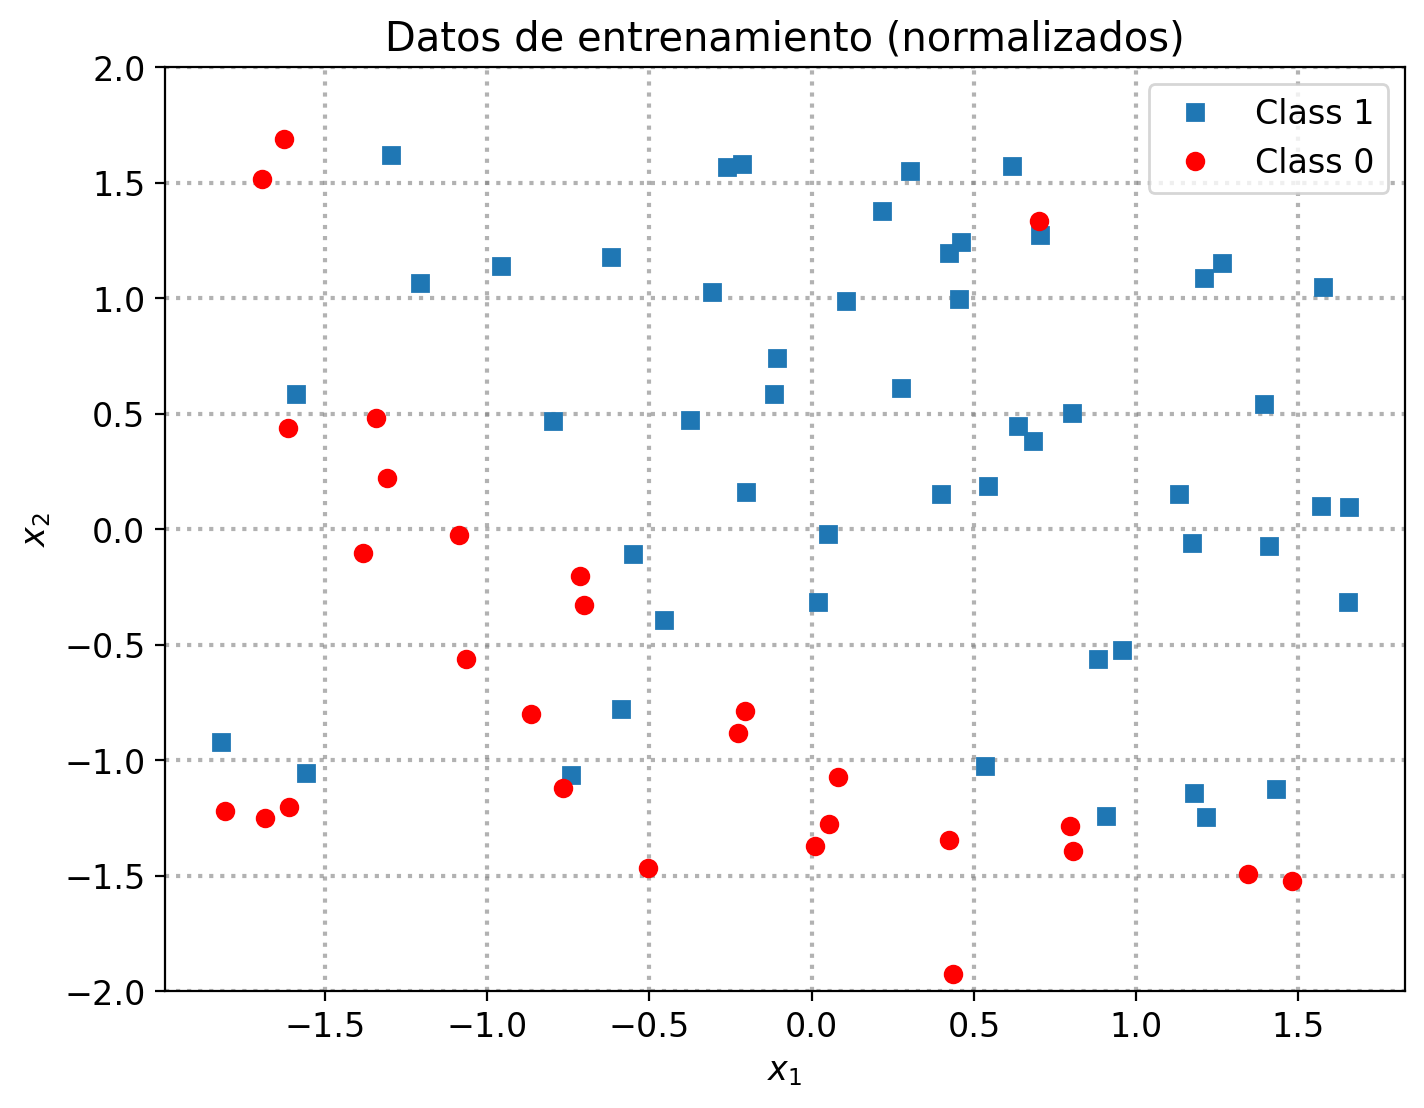

In [57]:
plt.figure()

## Plot Training Data
index=(Y1_train==1)
plt.plot(X01_train[index,0],X01_train[index,1],'s',label="Class 1")
index=(Y1_train==0)
plt.plot(X01_train[index,0],X01_train[index,1],'ro',label="Class 0")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Datos de entrenamiento')
#major grid lines
plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()


plt.figure()

## Plot Training Data
index=(Y1_train==1)
plt.plot(X1_train[index,0],X1_train[index,1],'s',label="Class 1")
index=(Y1_train==0)
plt.plot(X1_train[index,0],X1_train[index,1],'ro',label="Class 0")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.ylim([-2,2])
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Datos de entrenamiento (normalizados)')
#major grid lines
plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()




Con el siguiente código representamos las curvas de nivel de igual probabilidad estimadas por RL para distintos vectores $\mathbf{w}$ fijando $w_0=0$:

Cada línea representa puntos del plano (x_1,x_2) con igual probabilidad P(y=1|x)


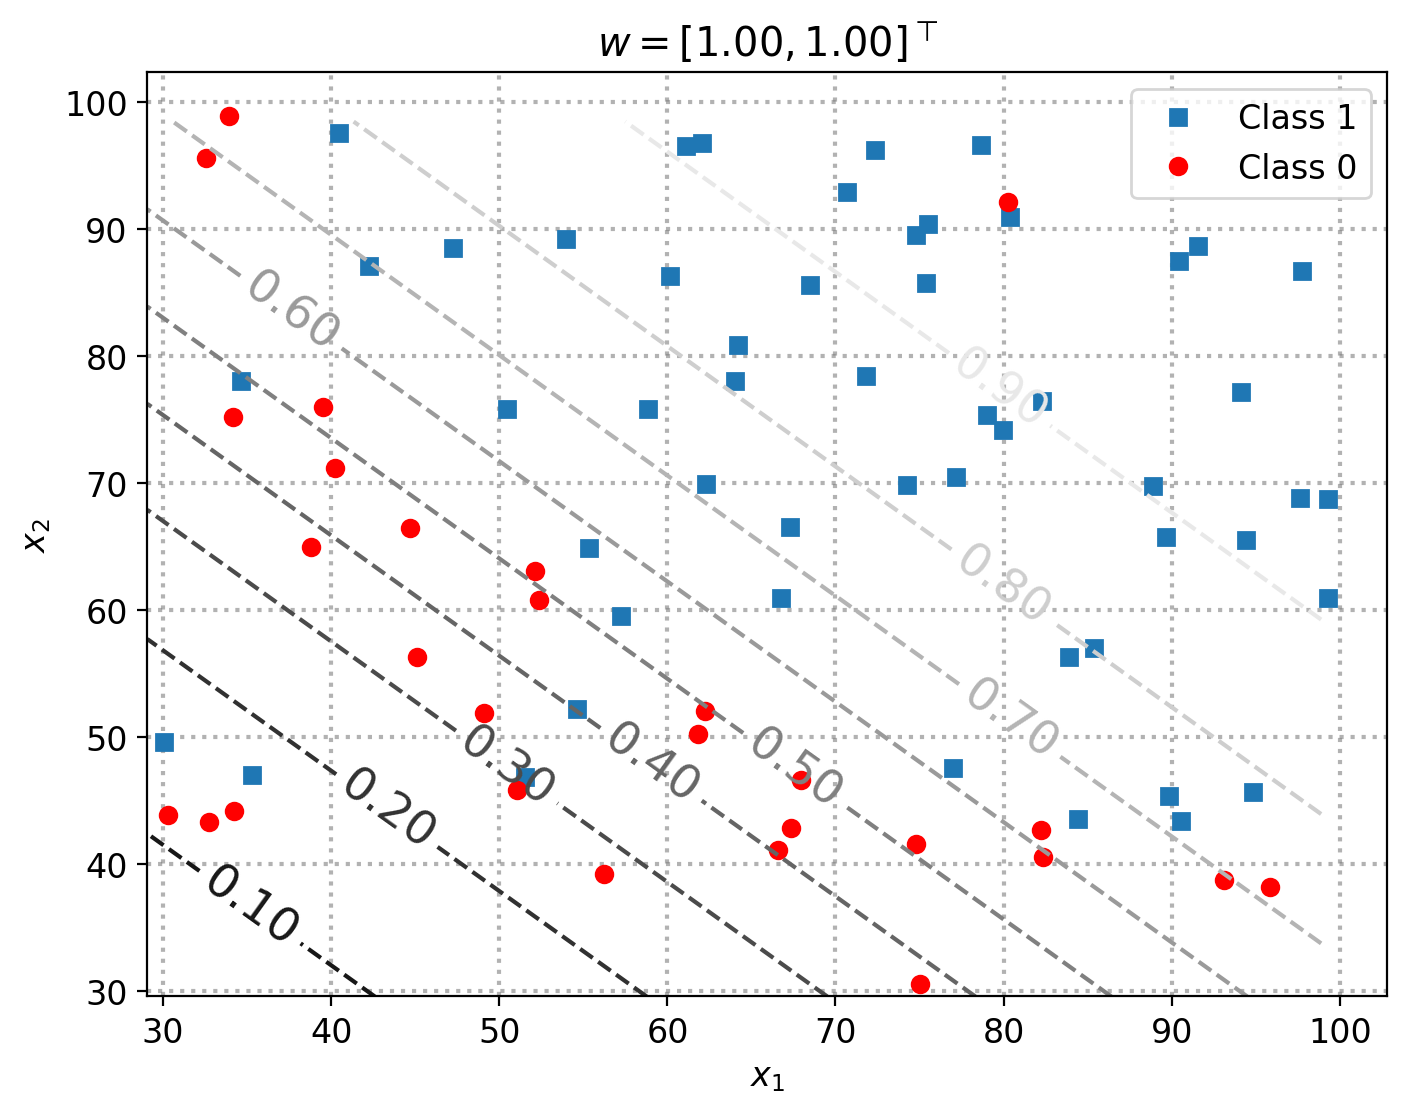

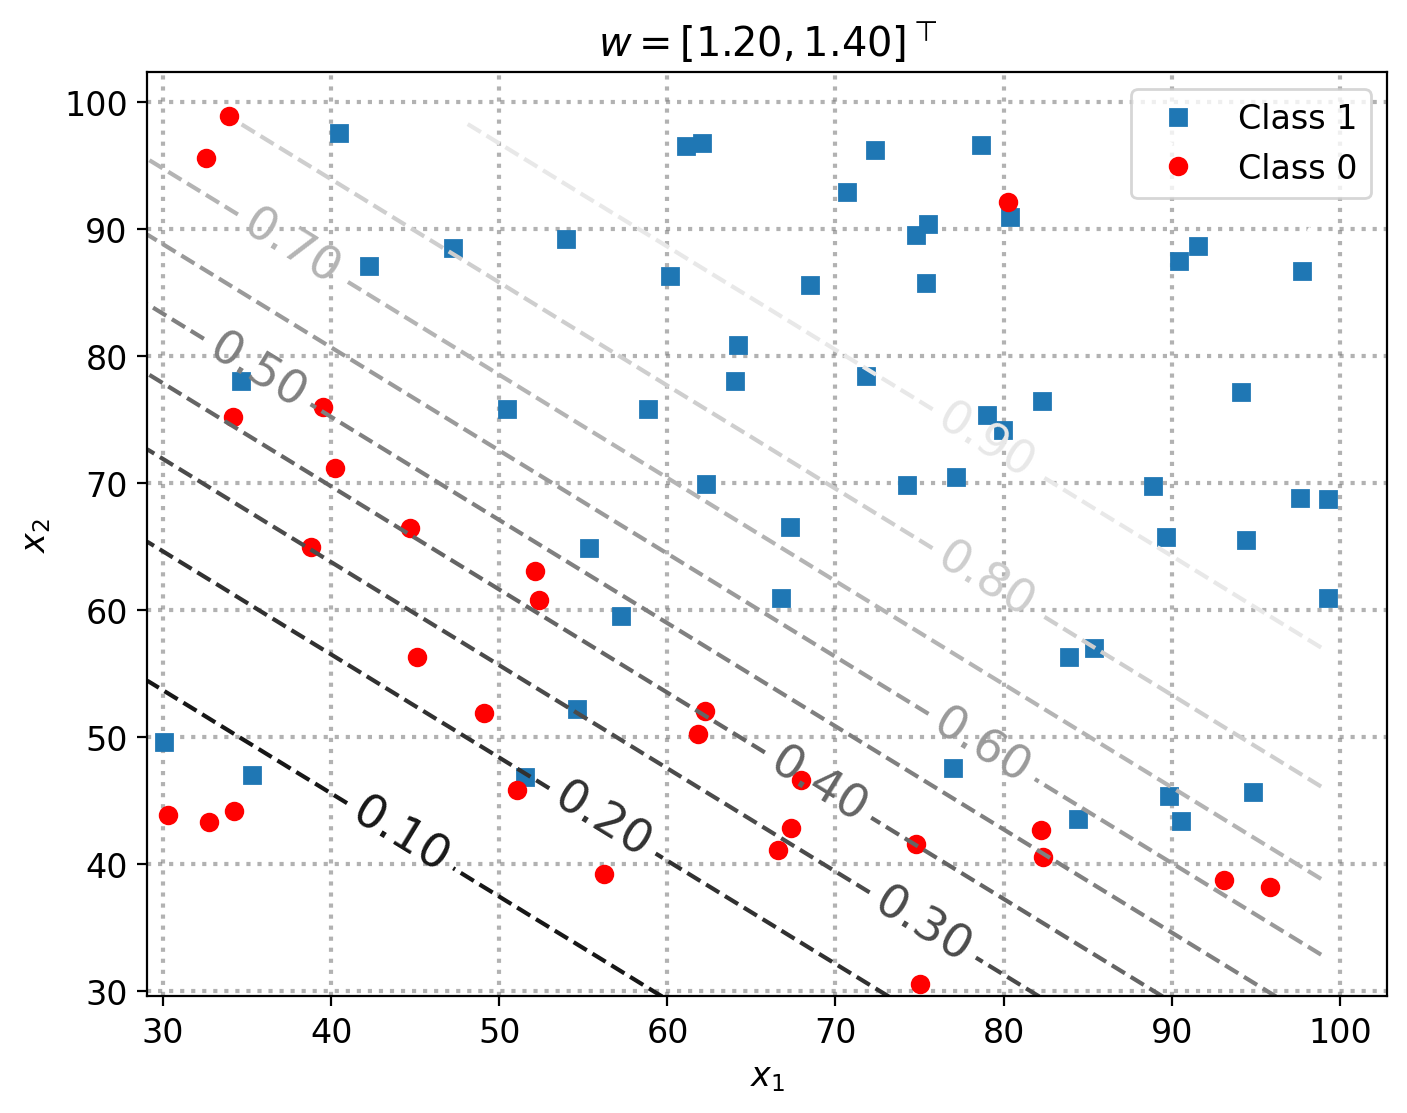

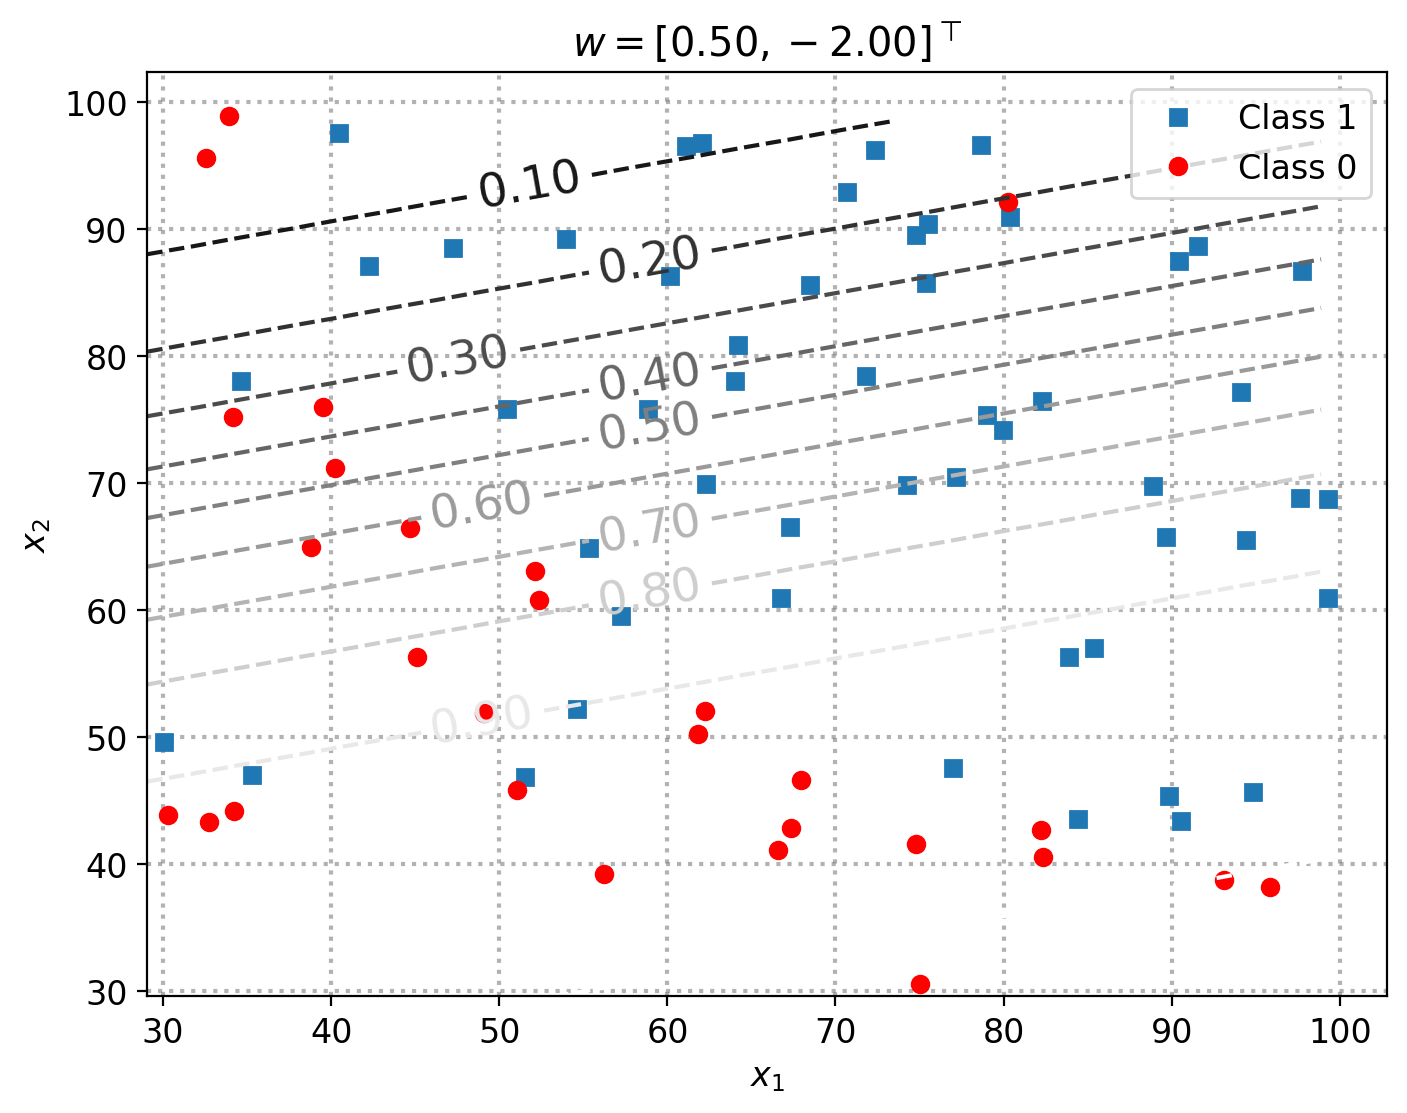

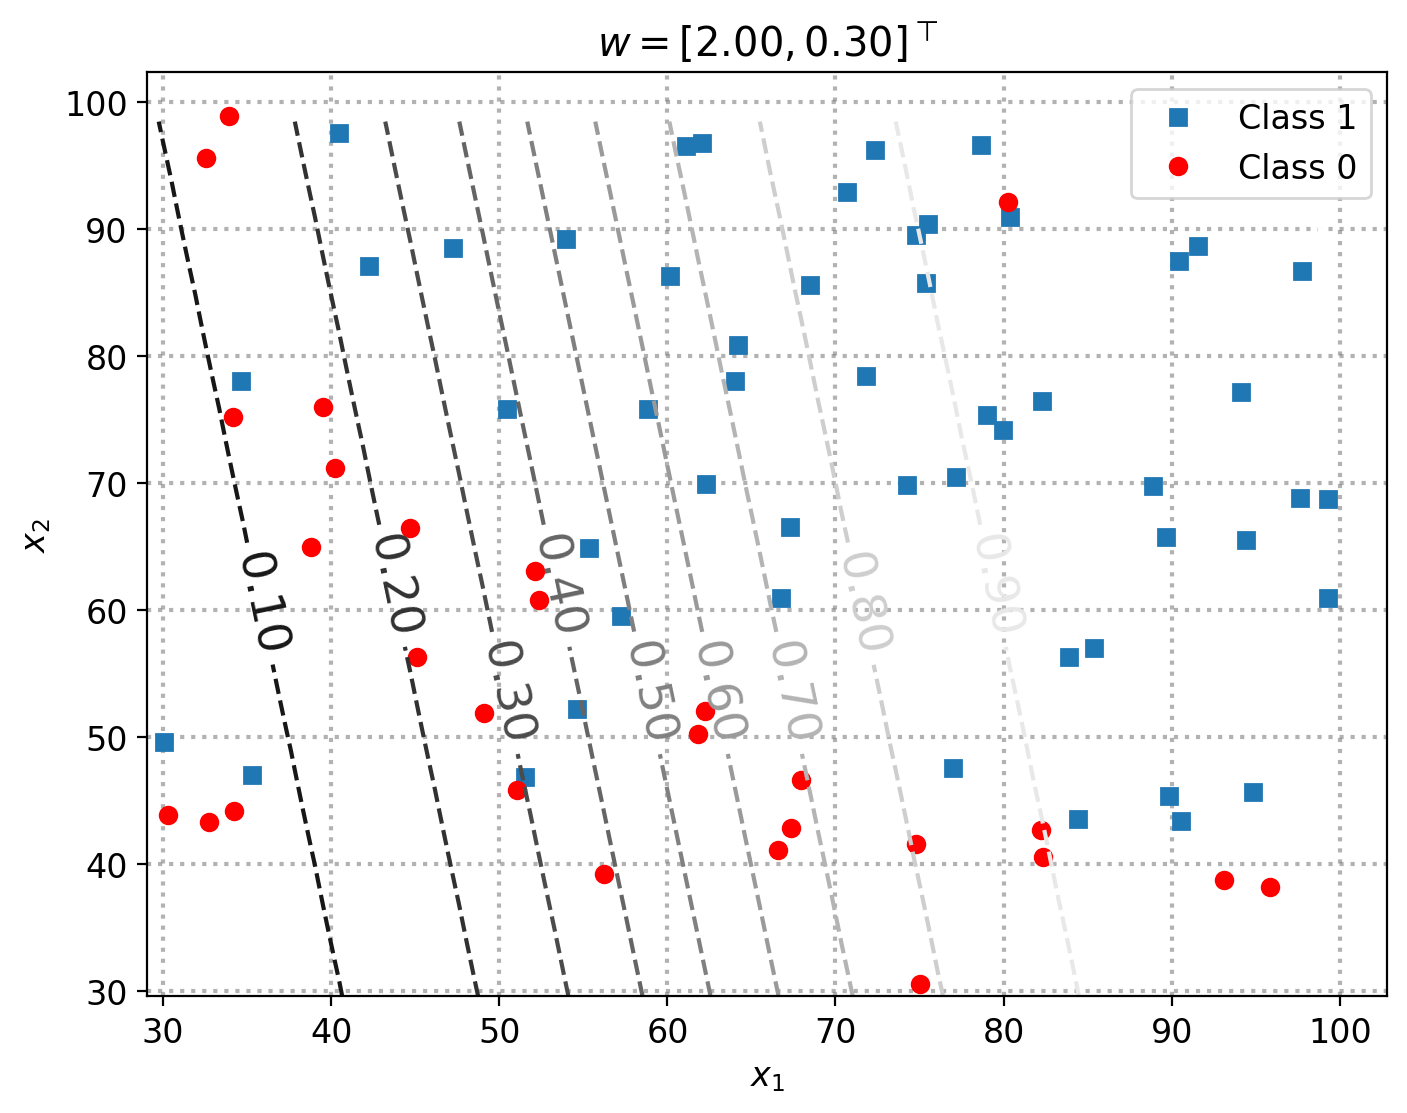

In [58]:
# Posibles vectores de parámetros
v_w = np.array([[1,1],
                [1.2,1.4],
                [0.5,-2],
                [2,.3]])

w0 = 0.97

n_w = v_w.shape[0]


# Obtenemos una rejilla de puntos en los que evaluaremos nuestro RL
# LA REJILLA SE DEFINE EN EL ESPACIO ORIGINAL DE LOS DATOS (ANTES DE NORMALIZAR)
x1,x2 = np.mgrid[min1:max1:(max1-min1)/50, min2:max2:(max2-min2)/50]
grid = np.transpose(np.row_stack([x1.ravel(), x2.ravel()]))
# Normalizamos la rejilla
grid_norm = transformer1.transform(grid)

values = [0.01] + list(np.arange(0.1,1,0.1)) + [0.99]


print(r"Cada línea representa puntos del plano (x_1,x_2) con igual probabilidad P(y=1|x)")

for iw in range(n_w):

    fx, ax = plt.subplots()

    w = v_w[iw,:]
    # Calculamos P(Y=1|X) para todos los puntos de la rejilla
    zgrid = 1./(1+np.exp(-grid_norm.dot(w)-w0))

    index=(Y1_train==1)
    ax.plot(X01_train[index,0],X01_train[index,1],'s',label="Class 1")
    index=(Y1_train==0)
    ax.plot(X01_train[index,0],X01_train[index,1],'ro',label="Class 0")
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
    ax.set_title("$w=[{0:.2f}, {1:.2f}]^\\top$".format(w[0],w[1]))
    CS = ax.contour(x1,x2,np.reshape(zgrid,np.shape(x1)),values,cmap=cm.gray,linestyles='dashed')
    ax.clabel(CS, inline=1, fontsize=17)
    ax.legend(loc='upper right')


## Función de coste en Regresión Logística
---

Para seleccionar el vector $\mathbf{w}$, RL resuelve el siguiente problema de optimización:

$$l({\bf w}) = \sum_{i=1}^N \left\lbrace  y^{(i)}\log \left(  P(Y=1| {\bf x}^{(i)})\right)  + (1-y^{(i)}) \log\left(  1- P(Y=1| {\bf x}^{(i)}) \right)  \right\rbrace $$

$${\bf w}^* =\displaystyle \underset{{\bf w}}{\operatorname{max}} l({\bf w})$$

- Que no es más que intentar alinear las regiones de probabilidades constantes con **las probabilidades de las etiquetas reales**.
- Este problema no tiene solución cerrada. Se resuelve con optimización numérica.

Visualicemos la frontera de decisión en el problema anterior.


A continuación, entrenaremos un RL con los parámetros por defecto en sklearn (luego hablaremos del entrenamiento en sí  y qué parámetros nos ofrece la [implementación de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

In [59]:
mi_RL1 = LR(C=1e8)  # C es el parámetro de regularización. Un valor muy alto significa que no regularizamos el modelo.
# Luego hablamos de esto

# Entrenamos el modelo
mi_RL1.fit(X1_train,Y1_train)


LogisticRegression(C=100000000.0)

Los pesos del modelo entrenado son los siguientes

In [60]:
print("El vector w es")
print(mi_RL1.coef_)
print("Y el bias w0 es")
print(mi_RL1.intercept_)

El vector w es
[[1.19892785 1.39094963]]
Y el bias w0 es
[0.97471675]


Dibujemos primero la frontera de decisión $P(y=1|\mathbf{x})=0.5$

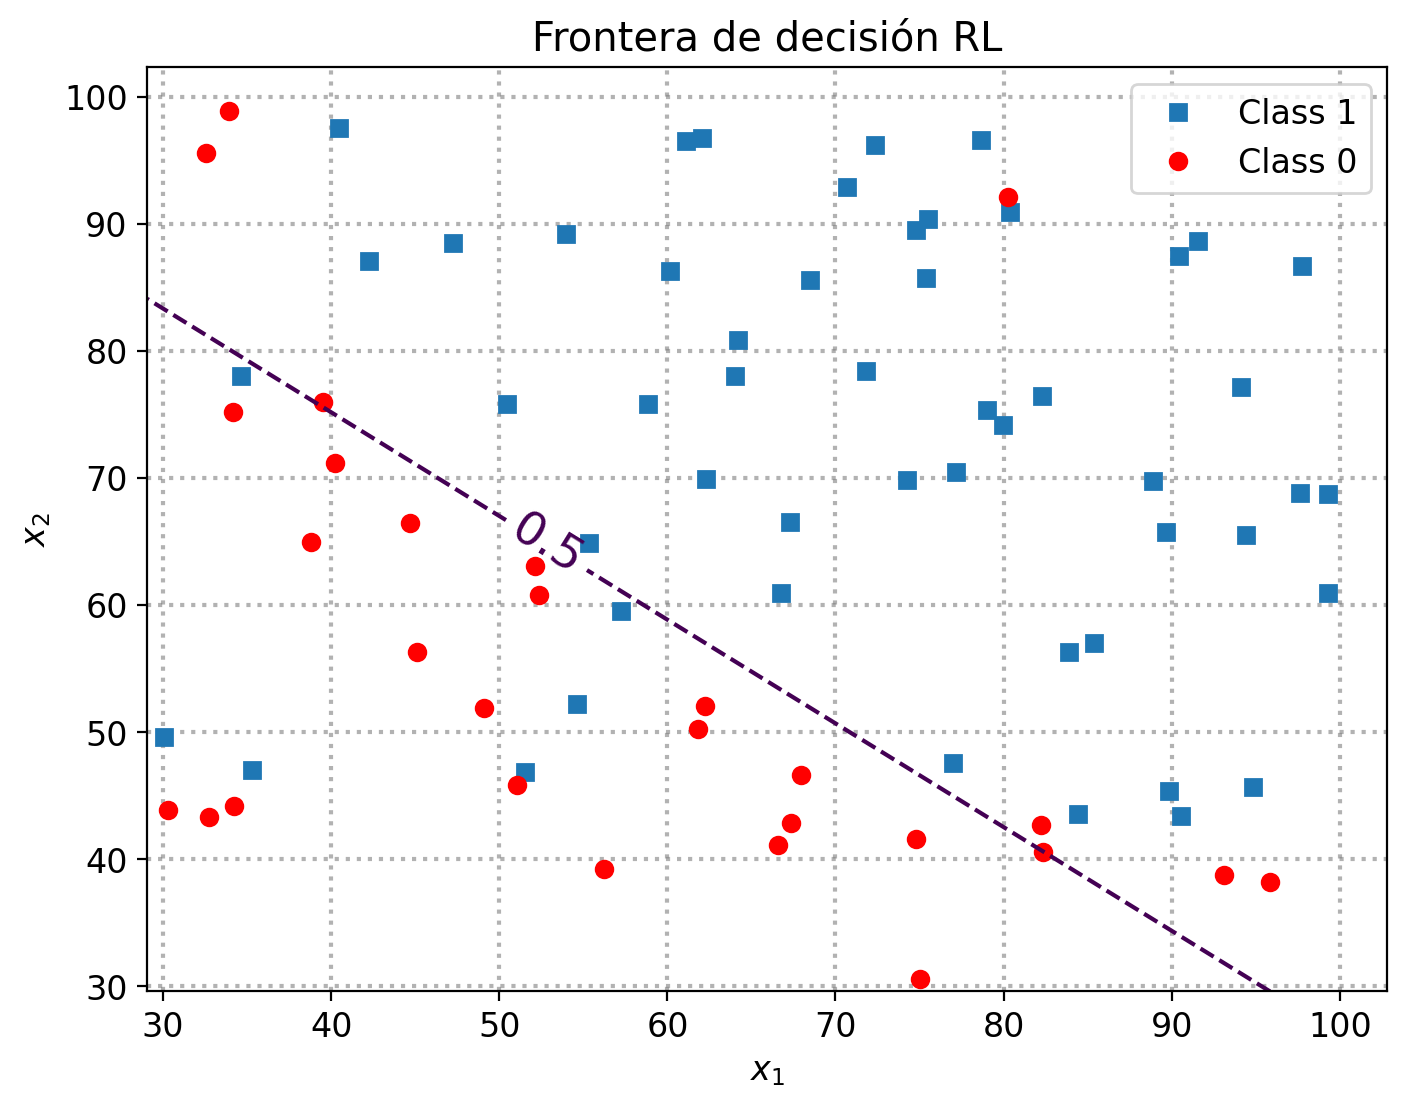

In [61]:
probs_LR1=mi_RL1.predict_proba(grid_norm)

fig, ax = plt.subplots()
## Plot Training Data
plt.plot(X01_train[Y1_train==1,0],X01_train[Y1_train==1,1],'s',label="Class 1")
plt.plot(X01_train[Y1_train==0,0],X01_train[Y1_train==0,1],'ro',label="Class 0")
cs = ax.contour(x1,x2,np.reshape(probs_LR1[:,1],np.shape(x1)),[0.5],linestyles='dashed')
ax.clabel(cs, inline=1, fontsize=17)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper right')
plt.title(r'Frontera de decisión RL')
#major grid lines
plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()

Y a continuación el mapa de probabilidades final ...

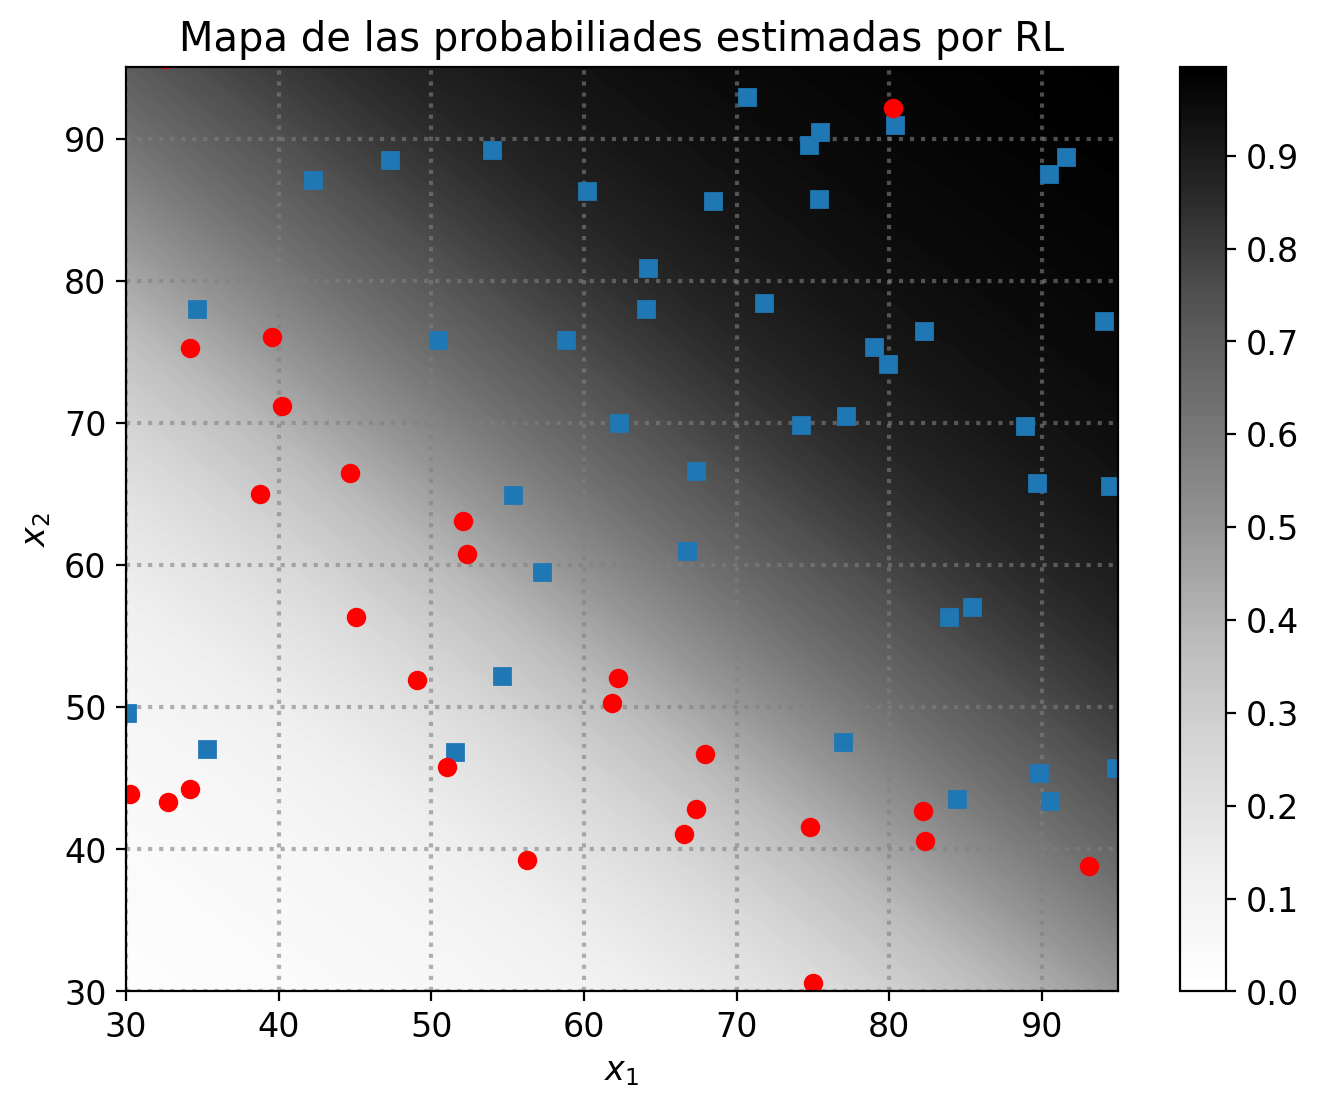

In [62]:
fig, ax = plt.subplots()
## Plot Training Data
plt.plot(X01_train[Y1_train==1,0],X01_train[Y1_train==1,1],'s',label="Class 1")
plt.plot(X01_train[Y1_train==0,0],X01_train[Y1_train==0,1],'ro',label="Class 0")
cs = ax.contourf(x1,x2,np.reshape(probs_LR1[:,1],np.shape(x1)),np.arange(0,1,0.005),linestyles='dashed',cmap='Greys')
cbar = fig.colorbar(cs)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([30,95])
plt.ylim([30,95])
plt.title('Mapa de las probabiliades estimadas por RL')
#major grid lines
plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.show()

Antes de seguir, compactemos el código para representar figuras como las que ya hemos visto en una función, con esto ahorraremos muchas líneas de código.

In [ ]:
def muestra_frontera(X_train,Y_train,x1_grid=None,x2_grid=None,probs_grid=None,dataset=False,frontera=False,thresholds=[0.5],
                     prob_levels=False, titulo='Datos',xlabel='$x_1$',ylabel='$x_2$'):

    """
    - dataset=True --> Representamos solo el dataset
    - frontera=True --> Representamos dataset con frontera de decisión (podemos especificar mas niveles con thresholds)
    - prob_levels=True --> Representamos dataset con curvas de nivel de probabilidad de clase 1.
    """

    # Identificamos clases
    clases = np.unique(Y_train).astype(np.int32)
    labels = ['Class ' + str(int(c)) for c in clases]

    if(dataset==True):

        # Dibujamos únicamente dataset
        plt.figure()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()

    if(frontera==True):

        # Dibujamos dataset + líneas de contorno definidas en `thresholds`
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        cs=ax.contour(x1_grid,x2_grid,np.reshape(probs_grid[:,1],np.shape(x1)),thresholds,linestyles='dashed')
        ax.clabel(cs, inline=1, fontsize=12)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()

    if(prob_levels==True):

        # Dibujamos dataset + mapa de probabilidades
        fig,ax = plt.subplots()
        for c in clases:
            plt.plot(X_train[Y_train==c,0],X_train[Y_train==c,1],'s',label=labels[c])
        cs = ax.contourf(x1_grid,x2_grid,np.reshape(probs_grid[:,1],np.shape(x1)),np.arange(0,1.1,0.0005),linestyles='dashed',cmap='Greys')
        cbar = fig.colorbar(cs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc='upper right')
        plt.title(titulo)
        plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
        plt.show()


# Algunas referencias para complementar y ampliar este notebook:

[1] C. M. Bishop, [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf), Chapter 3: Linear Models for regression. Springer, 2006.


Más sobre regularizaciones L1 y L2:
* Regularización L1 vs L2:[videolecture](https://www.youtube.com/watch?v=sO4ZirJh9ds)
* [Ordinary Least Squares and Ridge Regression Variance](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py)
* Compute [elastic net path with coordinate descent](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)
* [LARS](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression  
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)

Otras funciones de coste:
* [Huber loss](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)